In [2]:
!pip install collinearity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as pe

# Importing
import sklearn
from sklearn.datasets import load_boston
from sklearn.feature_selection import f_regression

from IPython.display import display

from collinearity import SelectNonCollinear
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dataset = pd.read_csv("https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV")

In [5]:
dataset['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [6]:
fraud = dataset.replace({'type' : { 'PAYMENT' : 0, 'TRANSFER' : 1, 'CASH_OUT' : 2, 'DEBIT' : 3, 'CASH_IN' : 4 }})


In [7]:
data = fraud.drop(['nameOrig', 'nameDest'], axis = 1)


In [8]:
fraud1 = fraud.dropna()
fraud1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,1,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,2,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,1,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


There are no null values, the dataset is complete

In [9]:
fraud.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.686309e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.491355e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,0.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,2.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


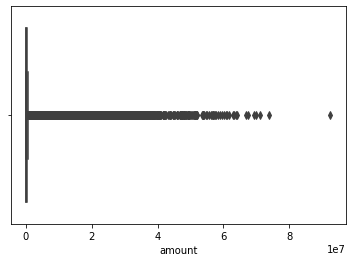

In [10]:
sns.boxplot(fraud['amount'])

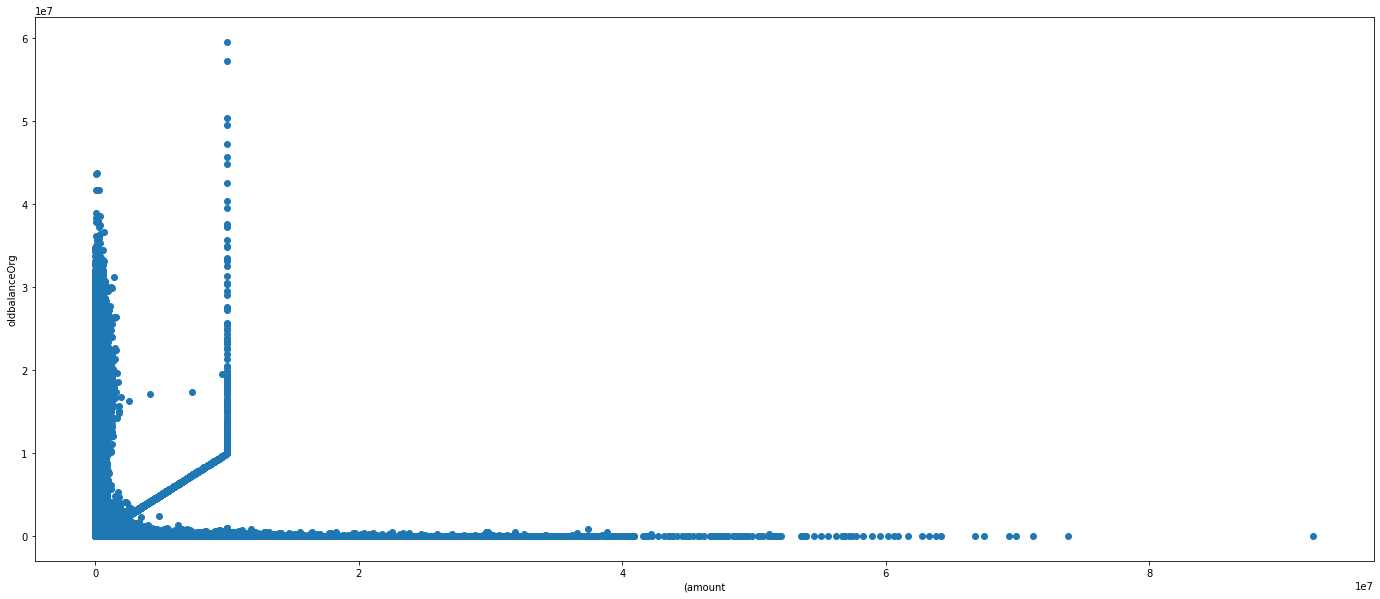

In [11]:

# Scatter plot
fig, ax = plt.subplots(figsize = (24,10))
ax.scatter(fraud['amount'], fraud['oldbalanceOrg'])
 
# x-axis label
ax.set_xlabel('(amount')
 
# y-axis label
ax.set_ylabel('oldbalanceOrg')
plt.show()

In [12]:
fraud.amount.quantile(0.99)

1615979.4715999917

In [13]:
outlier_top = fraud[fraud.amount <= fraud.amount.quantile(0.98)]

outlier_top

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,2,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362614,743,1,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362618,743,1,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [49]:
outlier_bottom = outlier_top[outlier_top.amount >= fraud.amount.quantile(0.01)]
df = outlier_bottom.dropna()

In [15]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
4,1,0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,0,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,0,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,2,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362614,743,1,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362618,743,1,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


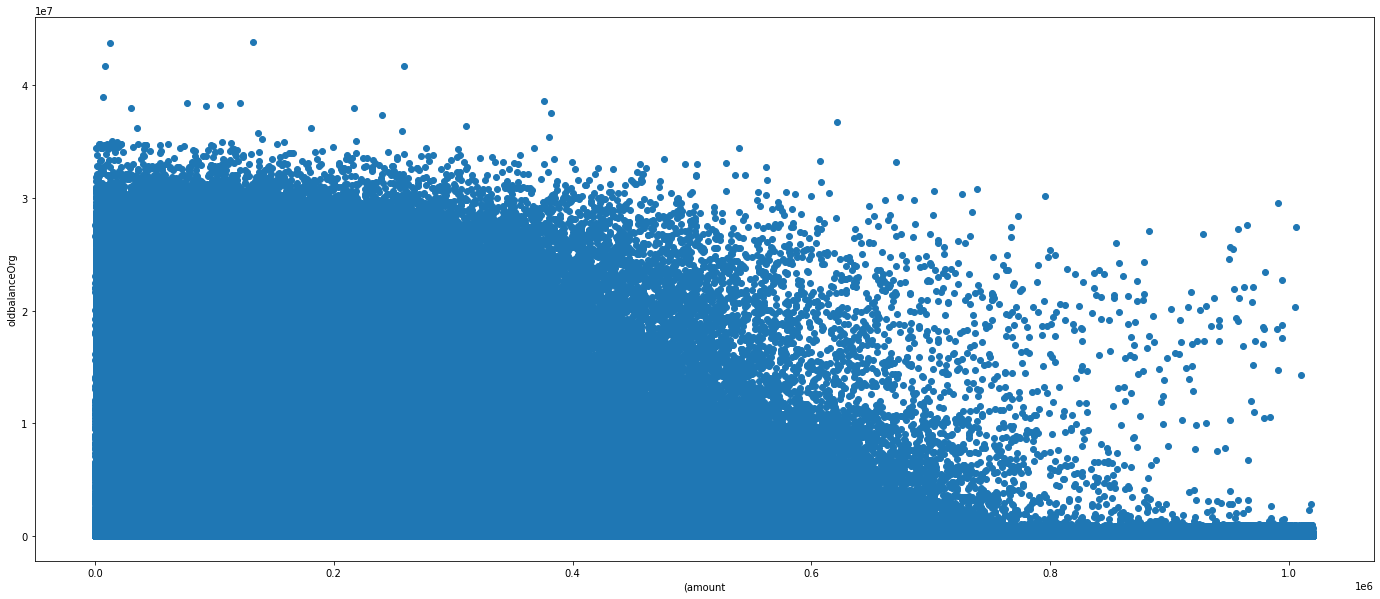

In [16]:
# Scatter plot
fig, ax = plt.subplots(figsize = (24,10))
ax.scatter(outlier_bottom['amount'], outlier_bottom['oldbalanceOrg'])
 
# x-axis label
ax.set_xlabel('(amount')
 
# y-axis label
ax.set_ylabel('oldbalanceOrg')
plt.show()

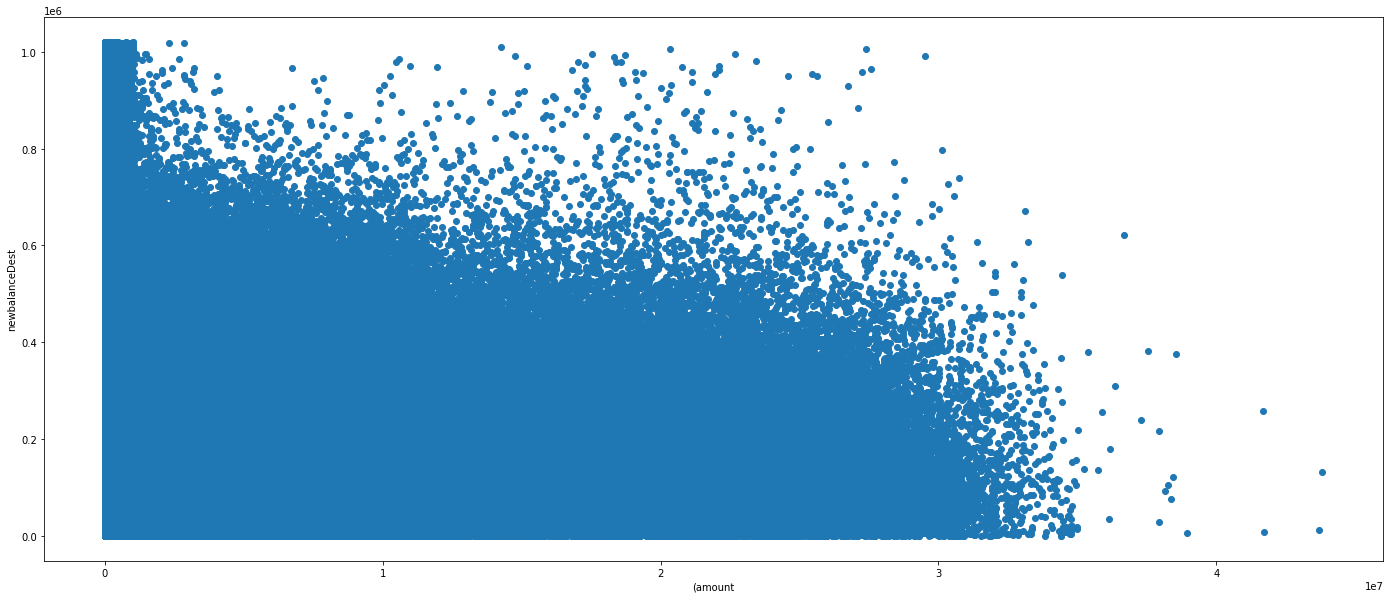

In [17]:
# Scatter plot
fig, ax = plt.subplots(figsize = (24,10))
ax.scatter(df['oldbalanceOrg'], df['amount'])
 
# x-axis label
ax.set_xlabel('(amount')
 
# y-axis label
ax.set_ylabel('newbalanceDest')
plt.show()

In [50]:
df_collinear = df.drop(['nameOrig', 'nameDest'], axis = 1)
df_collinear

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,0,1864.28,21249.00,19384.72,0.00,0.00,0,0
4,1,0,11668.14,41554.00,29885.86,0.00,0.00,0,0
5,1,0,7817.71,53860.00,46042.29,0.00,0.00,0,0
6,1,0,7107.77,183195.00,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362611,742,2,63416.99,63416.99,0.00,276433.18,339850.17,1,0
6362614,743,1,339682.13,339682.13,0.00,0.00,0.00,1,0
6362615,743,2,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362618,743,1,850002.52,850002.52,0.00,0.00,0.00,1,0


In [19]:
df_collinear.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06
mean,2.430281e+02,1.713671e+00,1.318949e+05,8.546096e+05,8.790064e+05,1.038830e+06,1.108085e+06,8.900245e-04,4.860866e-07
std,1.423696e+02,1.501462e+00,1.584800e+05,2.923083e+06,2.961129e+06,3.109497e+06,3.142373e+06,2.982000e-02,6.971990e-04
min,1.000000e+00,0.000000e+00,4.495000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,0.000000e+00,1.359179e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,2.000000e+00,7.264140e+04,1.474200e+04,0.000000e+00,1.296186e+05,2.039930e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,2.000000e+00,2.003448e+05,1.105841e+05,1.545384e+05,9.045545e+05,1.030644e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,1.019956e+06,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


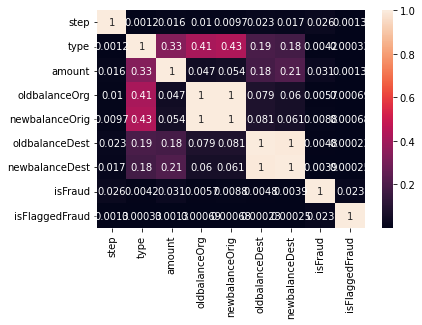

In [20]:
sns.heatmap(df_collinear.corr().abs(),annot=True)

In [21]:
df_collinear.oldbalanceOrg.describe()

count    6.171740e+06
mean     8.546096e+05
std      2.923083e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.474200e+04
75%      1.105841e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

The correlation between newbalanceDest and amount is signifiantly lesser now after removing outliers beyond 99%ile. 

In [51]:
df_collinear['oldbalance/amount'] = (df_collinear['oldbalanceOrg'])/(df_collinear['amount'])
#df_collinear

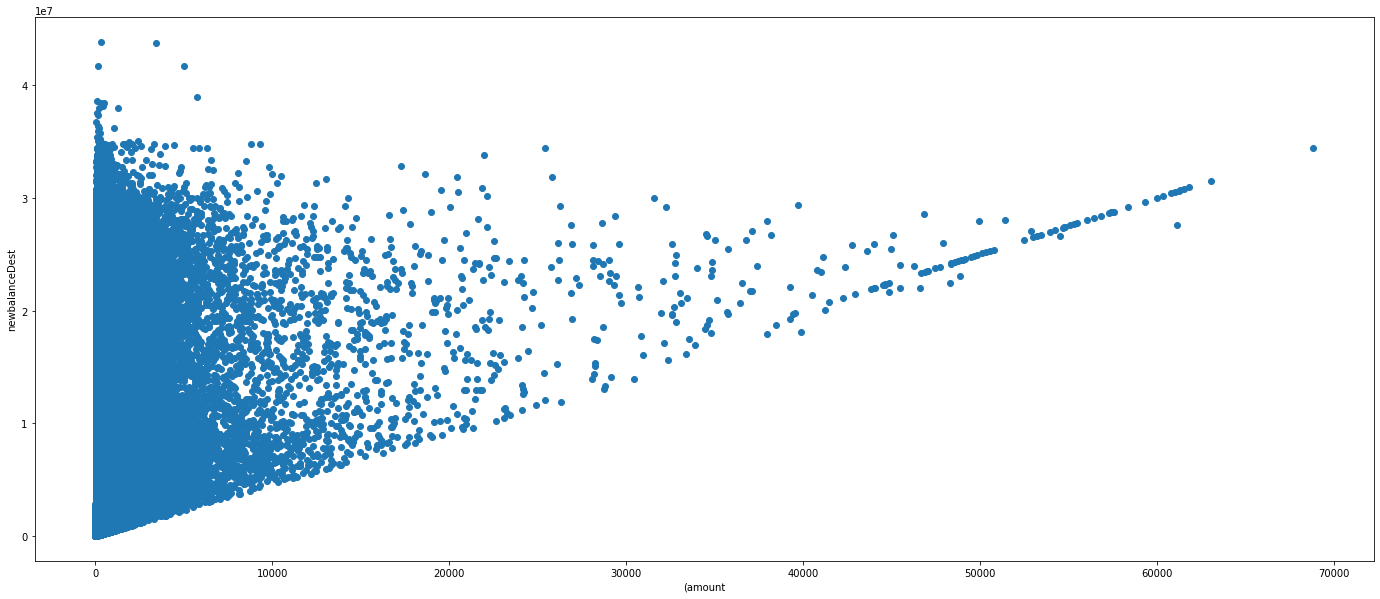

In [23]:
# Scatter plot
fig, ax = plt.subplots(figsize = (24,10))
ax.scatter(df_collinear['oldbalance/amount'], df_collinear['oldbalanceOrg'])
 
# x-axis label
ax.set_xlabel('(amount')
 
# y-axis label
ax.set_ylabel('newbalanceDest')
plt.show()

In [48]:
df_collinear.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalance/amount,newbalanceOrig_new
count,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06,6.171740e+06
mean,2.430281e+02,1.713671e+00,1.318949e+05,8.546096e+05,8.790064e+05,1.038830e+06,1.108085e+06,8.900245e-04,4.860866e-07,2.536246e+01,8.790074e+05
std,1.423696e+02,1.501462e+00,1.584800e+05,2.923083e+06,2.961129e+06,3.109497e+06,3.142373e+06,2.982000e-02,6.971990e-04,3.325900e+02,2.961129e+06
min,1.000000e+00,0.000000e+00,4.495000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.550000e+02,0.000000e+00,1.359179e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.380000e+02,2.000000e+00,7.264140e+04,1.474200e+04,0.000000e+00,1.296186e+05,2.039930e+05,0.000000e+00,0.000000e+00,1.708166e-01,1.000000e+00
75%,3.340000e+02,2.000000e+00,2.003448e+05,1.105841e+05,1.545384e+05,9.045545e+05,1.030644e+06,0.000000e+00,0.000000e+00,4.346829e+00,1.545394e+05
max,7.430000e+02,4.000000e+00,1.019956e+06,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,6.881490e+04,4.368662e+07


In [25]:
#dataframe for fraud transactions
filtered_data = df_collinear[df_collinear["isFraud"]==1]
filtered_data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalance/amount
251,1,1,2806.00,2806.00,0.0,0.00,0.00,1,0,1.0
252,1,2,2806.00,2806.00,0.0,26202.00,0.00,1,0,1.0
680,1,1,20128.00,20128.00,0.0,0.00,0.00,1,0,1.0
681,1,2,20128.00,20128.00,0.0,6268.00,12145.85,1,0,1.0
724,1,2,416001.33,0.00,0.0,102.00,9291619.62,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
6362611,742,2,63416.99,63416.99,0.0,276433.18,339850.17,1,0,1.0
6362614,743,1,339682.13,339682.13,0.0,0.00,0.00,1,0,1.0
6362615,743,2,339682.13,339682.13,0.0,0.00,339682.13,1,0,1.0
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00,1,0,1.0


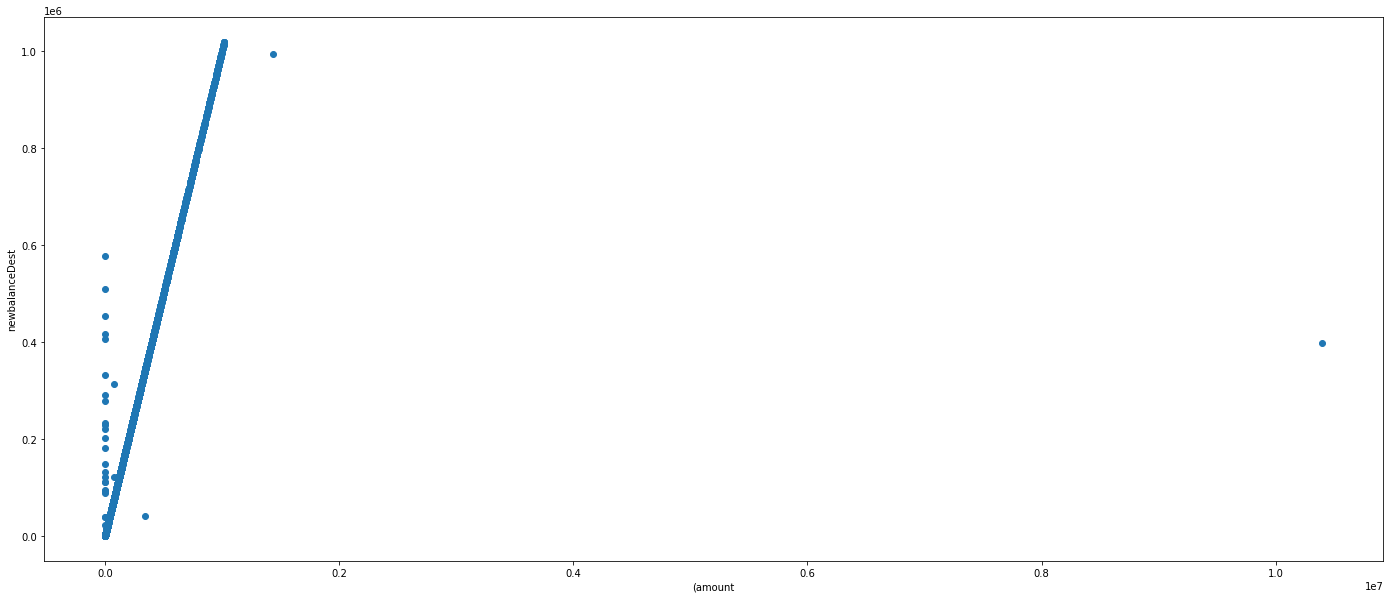

In [37]:
# Scatter plot
fig, ax = plt.subplots(figsize = (24,10))
ax.scatter(filtered_data['oldbalanceOrg'], filtered_data['amount'])
 
# x-axis label
ax.set_xlabel('(amount')
 
# y-axis label
ax.set_ylabel('newbalanceDest')
plt.show()

There is some relation between amount and oldbalance for fraudulant transactions. We can include a interaction term (oldbalance/amount) in the regression for accomodating this behaviour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


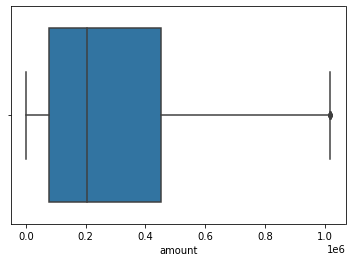

In [27]:
sns.boxplot(filtered_data['amount'])

In [55]:
Y = df_collinear["isFraud"]
X = df_collinear.drop(["newbalanceOrig", "step", "isFraud", "oldbalanceDest", "isFlaggedFraud"], axis = 1)


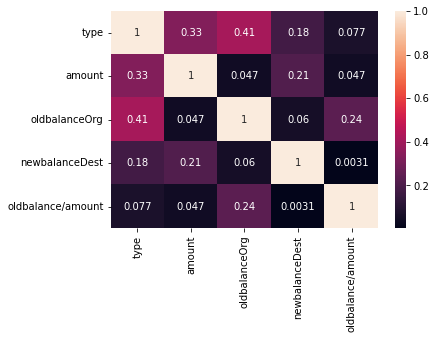

In [56]:
sns.heatmap(X.corr().abs(),annot=True)

In [30]:
filtered_data2 = df_collinear[df_collinear["isFraud"]==0]
filtered_data2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalance/amount
0,1,0,9839.64,170136.0,160296.36,0.00,0.00,0,0,17.290876
1,1,0,1864.28,21249.0,19384.72,0.00,0.00,0,0,11.397966
4,1,0,11668.14,41554.0,29885.86,0.00,0.00,0,0,3.561322
5,1,0,7817.71,53860.0,46042.29,0.00,0.00,0,0,6.889486
6,1,0,7107.77,183195.0,176087.23,0.00,0.00,0,0,25.773907
...,...,...,...,...,...,...,...,...,...,...
6362319,718,0,8634.29,518802.0,510167.71,0.00,0.00,0,0,60.086238
6362320,718,2,159188.22,3859.0,0.00,0.00,159188.22,0,0,0.024242
6362321,718,2,186273.84,168046.0,0.00,24893.67,211167.51,0,0,0.902145
6362322,718,1,82096.45,13492.0,0.00,0.00,82096.45,0,0,0.164343


In [31]:
print(df.oldbalanceOrg.mean(), df.newbalanceOrig.mean())

854609.6430206342 879006.3826726507


In [32]:
print(filtered_data.oldbalanceOrg.mean(), filtered_data.newbalanceOrig.mean())

297322.50774258096 2190.283813945021


We can see in the cleaned dataset, the average value of new balance of original account when fraud has been detected is very less, and is 0 in most cases. Therefore, new balance of original account is a good indicator of fraud.

We can use a probit model, ie, a linear probability model. In this model, by using the independent variables to predict the dependent variable (fraud), which would be a standard regrression model,  we instead predict the probability with which the dependent variable ( which is binary) takes a particular value - 0 0r 1.

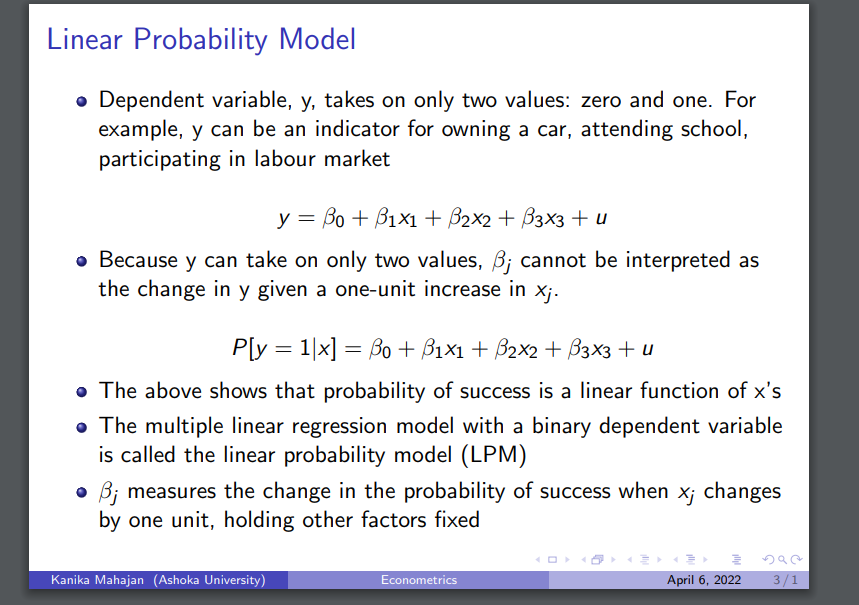

In [62]:

from IPython.display import Image
Image('/content/2022-06-01.png')

 


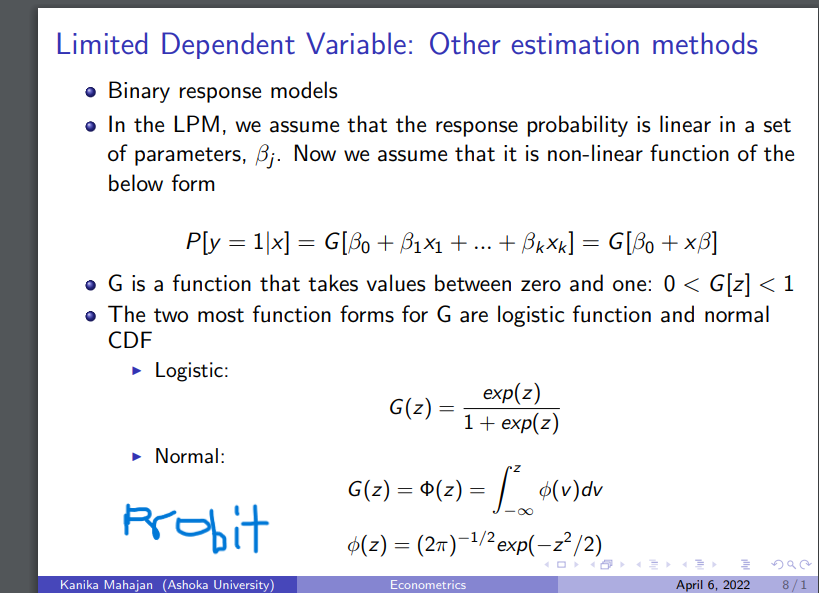

In [63]:
Image('/content/2022-06-01 (1).png')

In [57]:
X = sm.add_constant(X)
model = Probit(Y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.006607
         Iterations 26
                          Probit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              6171740
Model:                         Probit   Df Residuals:                  6171734
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Jun 2022   Pseudo R-squ.:                 0.07484
Time:                        07:52:28   Log-Likelihood:                -40776.
converged:                       True   LL-Null:                       -44075.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.1148      0.008   -407.257      0.000      -3.130      -3.100
type   

all predictors are statistically significant

  MARGINAL EFFECTS

  To better understand why predictors are significant, we study the marginal effects of our predictors, we will look at the predictors type, amount, oldbalanceOrg, newbalanceDest

In [64]:
mfx = probit_model.get_margeff()
print(mfx.summary())

       Probit Marginal Effects       
Dep. Variable:                isFraud
Method:                          dydx
At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
type                 -0.0002   1.05e-05    -16.706      0.000      -0.000      -0.000
amount             3.608e-09   6.81e-11     52.999      0.000    3.47e-09    3.74e-09
oldbalanceOrg      2.787e-10   1.62e-11     17.251      0.000    2.47e-10     3.1e-10
newbalanceDest    -3.161e-10   8.91e-12    -35.478      0.000   -3.34e-10   -2.99e-10
oldbalance/amount    -0.0001   6.55e-06    -18.640      0.000      -0.000      -0.000
